In [1]:
import numpy as np
import scipy
from scipy import signal
import mne
import glob
from sklearn.decomposition import PCA
import csv

In [2]:
local_path = './../../../data/raw/HV/HV1/HV1_F1_L_Removed_ICA.set'


In [3]:
data = mne.io.read_epochs_eeglab(local_path)._data

Extracting parameters from ./../../../data/raw/HV/HV1/HV1_F1_L_Removed_ICA.set...


<ipython-input-3-e0a8228b57c9>:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.io.read_epochs_eeglab(local_path)._data


56 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


In [4]:
data.shape

(56, 61, 1250)

In [5]:
n_components = 3

def pca(array, n_components=5, get_pca_object=False):
    pca = PCA(n_components=n_components)
    if not get_pca_object:
        return pca.fit_transform(array)
    return pca.fit_transform(array), pca

In [6]:
def log_result(file, name, accuracy, patients_correct, patients_total, set_name, channels, notes):
    writer = csv.writer(file)
    writer.writerow([name, str(accuracy*100) + '%', ' ' + str(patients_correct) + '/' + str(patients_total), set_name, channels, notes])
        

# Read and process data sets, apply dimensionality reduction

In [7]:
# Returns relevant datasets (f.e. all right-hand recordings of healthy patients) as a list of np arrays
def get_datasets(patient_type_location, recording_type_expression):
    if recording_type_expression != l_new:
        sets_locations = glob.glob(patient_type_location + recording_type_expression + suffix)
    else:
        sets_locations = glob.glob(patient_type_location + recording_type_expression)
    
    sets = []
    for path in sets_locations: 
        sets.append(mne.io.read_epochs_eeglab(path))
        
    return np.array(np.array([(patient._data) for patient in sets]))

In [8]:
root = './../../../'
suffix = '*.set'

location_healthy = root + 'data/raw/HV/*/'
location_pain = root + 'data/raw/PP/*/'
location_nopain = root + 'data/raw/PnP/*/'

location_pwp = root + 'data_new/raw/PwP/*/'
location_pdp = root + 'data_new/raw/PdP/*/'
location_pnp = root + 'data_new/raw/PnP/*/'


rh = '*_RH*'
lh = '*_LH*'
l_new = '*_L.set'   # NO SUFFIX
l_old = '*_L_*'

sets_healthy_rh = glob.glob(location_pnp + l_new)

sets_healthy_rh

['./../../../data_new/raw/PnP\\PnP_1\\PnP_1_L.set',
 './../../../data_new/raw/PnP\\PnP_3\\PnP_3_L.set',
 './../../../data_new/raw/PnP\\PnP_4\\PnP_4_L.set',
 './../../../data_new/raw/PnP\\PnP_5\\PnP_5_L.set',
 './../../../data_new/raw/PnP\\PnP_7\\PnP_7_L.set',
 './../../../data_new/raw/PnP\\PnP_8\\PnP_8_L.set',
 './../../../data_new/raw/PnP\\PnP_9\\PnP_9_L.set']

In [9]:
pp_rh_raw = get_datasets(location_pain, rh)
pnp_rh_raw = get_datasets(location_nopain, rh)

Extracting parameters from ./../../../data/raw/PP\PP1\PP1_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP10\PP10_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP11\PP11_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP2\PP2_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP3\PP3_F1_RH_Removed_ICA.set...
51 matching events found


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP4\PP4_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP5\PP5_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


56 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP6\PP6_F1_RH_Removed_ICA.set...
32 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


Extracting parameters from ./../../../data/raw/PP\PP7\PP7_F1_RH_Removed_ICA.set...
52 matching events found


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP9\PP9_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP1\PnP1_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


50 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP2\PnP2_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP3\PnP3_F1_RH_Removed_ICA.set...
44 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP4\PnP4_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


55 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP5\PnP5_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


50 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP6\PnP6_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


55 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP7\PnP7_F01_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP8\PnP8_F1_RH_Removed_ICA.set...
53 matching events found


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP9\PnP9_F1_RH_Removed_ICA.set...


<ipython-input-7-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


54 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


In [10]:
pp_rh_raw

array([array([[[ 1.44402540e-06,  9.81420040e-07,  6.11681223e-07, ...,
         -9.48653758e-07, -7.09739447e-07, -1.82451889e-07],
        [ 9.12692308e-07,  5.66146672e-07,  3.27923447e-07, ...,
         -3.50943863e-07, -1.84928596e-07,  2.25423664e-07],
        [ 3.08533460e-07, -1.32956609e-07, -4.29266930e-07, ...,
         -5.50954044e-07, -7.25167394e-07, -7.38074183e-07],
        ...,
        [-2.49450371e-07,  1.48201084e-06,  2.35830712e-06, ...,
          3.37429857e-06,  3.04905009e-06,  2.29389977e-06],
        [-5.30285418e-07,  8.94802094e-07,  1.52956212e-06, ...,
          3.27083945e-06,  2.76214886e-06,  1.80594766e-06],
        [-3.62152141e-09,  8.68661761e-07,  1.26055551e-06, ...,
          1.93071413e-06,  1.70576549e-06,  1.27043426e-06]],

       [[ 1.15336525e-06,  1.83704400e-06,  2.49183202e-06, ...,
         -9.63494658e-07, -7.82364130e-07, -3.78079295e-07],
        [ 3.36746752e-07,  6.24162018e-07,  9.46212053e-07, ...,
         -1.13700712e-06, -1.07

In [11]:
pp_rh_raw[4].shape

(51, 61, 1250)

In [12]:

pp_rh = np.array([np.array([pca(arr, n_components=n_components) for arr in patient]) for patient in pp_rh_raw])
pnp_rh = np.array([np.array([pca(arr, n_components=n_components) for arr in patient]) for patient in pnp_rh_raw])


#pp_rh = pp_rh_raw
#pnp_rh = pnp_rh_raw

In [13]:
pp_count = np.vstack(pp_rh).shape[0]
pnp_count = np.vstack(pnp_rh).shape[0]
pnp_count

473

In [14]:
pnp_rh[0].shape

(50, 61, 3)

Set some patients aside for testing

In [15]:
pp_and_pnp_bp = np.concatenate((pp_rh, pnp_rh))
pp_and_pnp_bp.shape

(19,)

In [16]:
# Returns a pair consisting of boolean (True is test patient is PP) and test label
def test_setup(test_index, total_size):
    test_is_pp = test_index < len(pp_rh)
    test_label = 1 if test_is_pp else 0
    return test_is_pp, test_label

# Splits into train and test based on the index of the test patient
# Returns pair of test and train
def get_train_test(data, test_index):
    return data[test_index], np.delete(data, test_index)

# Returns pair of the lengths of PP train data and respectively PNP train data
def get_pp_pnp_length(pp_count, pnp_count, test_count, test_is_pp):
    pp_train_len = pp_count if not test_is_pp else pp_count - test_count
    pnp_train_len = pnp_count if test_is_pp else pnp_count - test_count
    return pp_train_len, pnp_train_len

# Ravel first dimention so that trials from all patients are treated separately; select channels
def ravel_all_trials(data, channels):
    return np.array(list(map(np.ravel, data[:, channels, :])))

In [17]:
test_index = 4

test_is_pp, test_label = test_setup(test_index, len(pp_rh))
test_label

1

In [62]:
test_p, train_p = get_train_test(pp_and_pnp_bp, test_index)
test_p.shape

(51, 61, 3)

In [19]:
train_p_separated = np.vstack(train_p)
train_p_separated.shape

(952, 61, 3)

In [20]:
pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
pp_train_len

479

In [21]:
mul = 1

In [22]:
selected_channels = [10, 11]

In [23]:
train = ravel_all_trials(train_p_separated, selected_channels) * mul
train.shape

(952, 6)

In [24]:
test = ravel_all_trials(test_p, selected_channels) * mul
test.shape

(51, 6)

In [25]:
train

array([[-4.21590341e-05, -1.70529086e-05,  9.72195211e-06,
        -5.04268647e-05,  1.46839011e-05, -6.80114012e-06],
       [-3.83201365e-05, -1.58890191e-05,  6.94047223e-06,
        -5.00309448e-05,  8.92401095e-06, -5.91319606e-06],
       [-4.39308042e-05, -2.87261617e-05,  7.42458884e-06,
        -5.19058545e-05,  2.80614962e-05, -1.10707763e-05],
       ...,
       [-7.05476796e-05, -2.62273778e-05,  4.86001267e-05,
        -3.73980023e-05, -6.41225946e-05,  3.08422237e-05],
       [-9.13145012e-05, -2.91083627e-05,  5.21938106e-05,
        -5.85839427e-05, -6.62395968e-05,  3.41647645e-05],
       [-4.88971813e-05, -9.12514806e-05, -6.47139036e-05,
        -9.97232640e-05, -7.80329496e-05, -2.94285322e-05]])

In [26]:
n_components = 3

In [27]:
pca(train, n_components).shape

(952, 3)

Some analysis of the PCA components

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [43]:
channels_to_plot = list(range(61))

arr_pp, components_pp = pca(ravel_all_trials(np.vstack(pp_rh_raw), channels_to_plot), n_components, get_pca_object=True)
arr_pnp, components_pnp = pca(ravel_all_trials(np.vstack(pnp_rh_raw), channels_to_plot), n_components, get_pca_object=True)

arr_all, components_all = pca(ravel_all_trials(np.vstack(np.concatenate((pp_rh_raw, pnp_rh_raw))), channels_to_plot), n_components, get_pca_object=True)

components_pp.components_.shape

(3, 76250)

In [44]:
plot_mul = 10**10

In [45]:
arr_all.shape

(1003, 3)

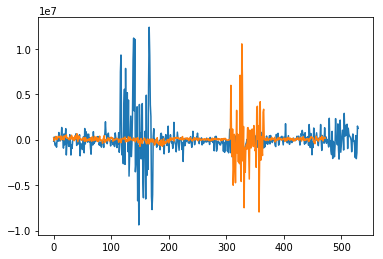

In [354]:
plt.plot(arr_pp[:,0]*plot_mul)
plt.plot(arr_pnp[:,0]*plot_mul)

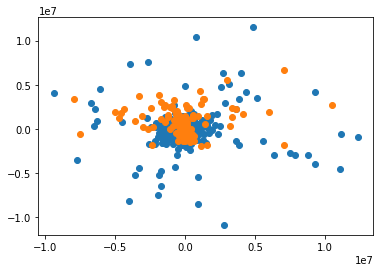

In [355]:
plt.scatter(arr_pp[:,0]*plot_mul,arr_pp[:,1]*plot_mul)
plt.scatter(arr_pnp[:,0]*plot_mul,arr_pnp[:,1]*plot_mul)
#plt.xlim((-0.18, 0.1))
#plt.ylim((-0.2, 0.2))

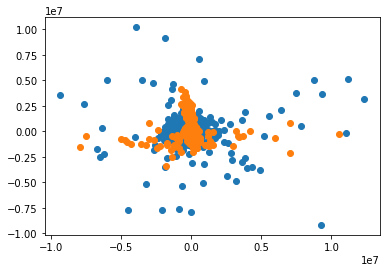

In [356]:
plt.scatter(arr_pp[:,0]*plot_mul,arr_pp[:,2]*plot_mul)
plt.scatter(arr_pnp[:,0]*plot_mul,arr_pnp[:,2]*plot_mul)
#plt.xlim((-0.12, 0.1))
#plt.ylim((-0.15, 0.2))

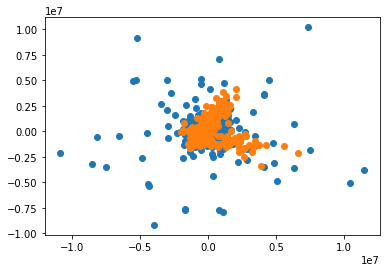

In [357]:
plt.scatter(arr_pp[:,1]*plot_mul,arr_pp[:,2]*plot_mul)
plt.scatter(arr_pnp[:,1]*plot_mul,arr_pnp[:,2]*plot_mul)
#plt.xlim((-0.12, 0.1))
#plt.ylim((-0.15, 0.2))

In [358]:
np.mean(components_pp.components_[0])

-3.0209160122416766e-12

In [113]:
plt_vmin = 0
plt_vmax = 0.05

In [114]:
comp_sep_all_pp = np.array([np.array([pca(arr, n_components=n_components, get_pca_object=True)[1] for arr in patient]) for patient in pp_rh_raw])
comp_sep_all_pnp = np.array([np.array([pca(arr, n_components=n_components, get_pca_object=True)[1] for arr in patient]) for patient in pnp_rh_raw])

In [115]:
comp_sep_all = np.array([[r.components_[c] for r in np.hstack(np.concatenate((c_sep_all_pp, c_sep_all_pnp)))] for c in range(n_components)])

In [116]:
np.std(np.abs(comp_sep_all[0]))

0.017726422325280156

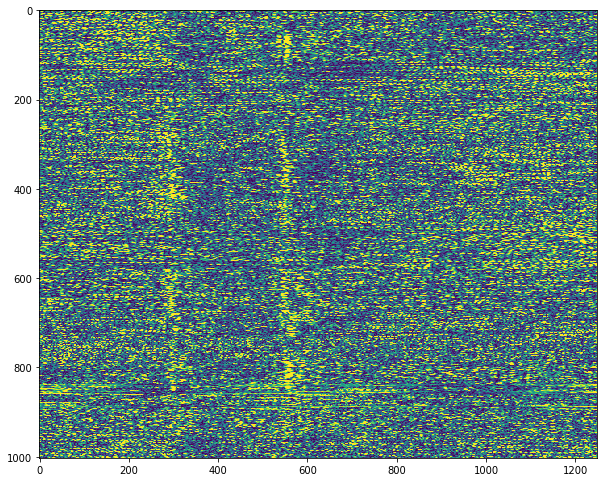

In [117]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(comp_sep_all[0]), vmin=plt_vmin, vmax=plt_vmax)

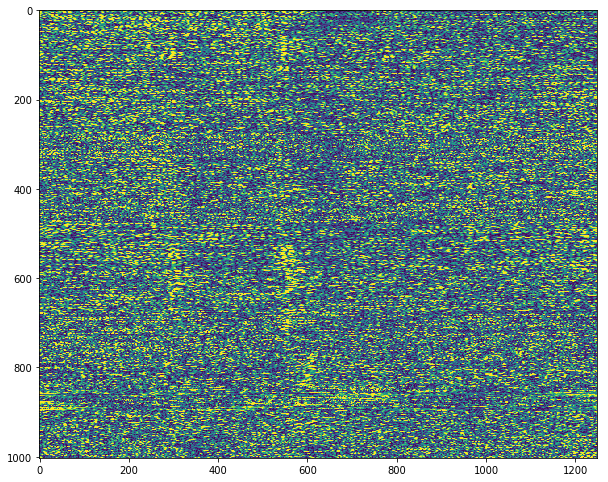

In [118]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(comp_sep_all[1]), vmin=plt_vmin, vmax=plt_vmax)

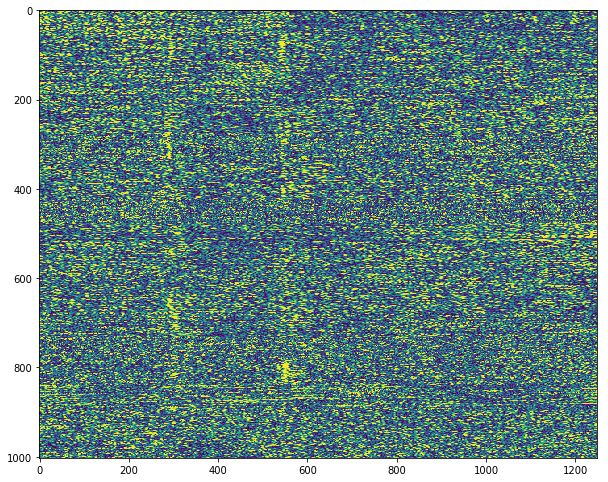

In [119]:
plt.figure(figsize=(10,10))
plt.imshow(np.abs(comp_sep_all[2]), vmin=plt_vmin, vmax=plt_vmax)

In [99]:
plt_vmin = 0
plt_vmax = 0.01

In [75]:
comp_weights = np.array([[c[channel::len(channels_to_plot)] for channel in list(range(len(channels_to_plot))) ] for c in components_all.components_ ])
comp_weights.shape

(3, 61, 1250)

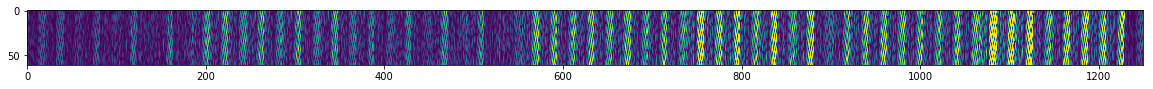

In [361]:
#series_samples_index = np.mod(np.arange(comp_weights.shape[2]),20)<5

plt.figure(figsize=(20, 20))
plt.imshow(np.abs(comp_weights[0][:, :]), vmin=plt_vmin, vmax=plt_vmax)

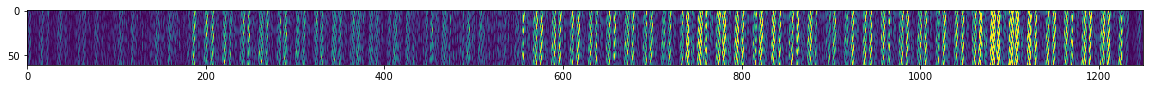

In [362]:
plt.figure(figsize=(20, 20))
plt.imshow(np.abs(comp_weights[1][:, :]), vmin=plt_vmin, vmax=plt_vmax)

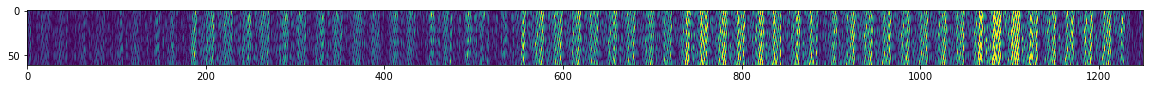

In [363]:
plt.figure(figsize=(20, 20))
plt.imshow(np.abs(comp_weights[2][:, :]), vmin=plt_vmin, vmax=plt_vmax)

In [218]:
labels = [1] * pp_train_len + [0] * pnp_train_len
test_labels = [test_label] * len(test)

It's time to learn

In [219]:
from sklearn import neighbors, svm
from sklearn.model_selection import train_test_split

In [143]:
knn = neighbors.KNeighborsClassifier(n_neighbors=130)

In [144]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.05)

In [145]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=130, p=2,
                     weights='uniform')

In [146]:
knn.score(x_train, y_train)

0.6814159292035398

In [147]:
knn.score(x_test, y_test)

0.6041666666666666

In [148]:
knn.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [149]:
np.count_nonzero(knn.predict(test) == test_labels)/len(test)

0.0

### Cross validation

In [342]:
def classify_knn_with_xvalid(data_pp_bp, data_pnp_bp, n_neighbours, selected_channels, test_index, mul, verbose=True):
    
    data_bp = np.concatenate((data_pp_bp, data_pnp_bp))
    
    test_is_pp, test_label = test_setup(test_index, len(data_pp_bp))
    test_p, train_p = get_train_test(data_bp, test_index)
    train_p_separated = np.vstack(train_p)
    pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
    
    train = ravel_all_trials(train_p_separated, selected_channels) * mul
    test = ravel_all_trials(test_p, selected_channels) * mul
    
    labels = [1] * pp_train_len + [0] * pnp_train_len
    test_labels = [test_label] * len(test)
    
    if verbose:
        print('Test index', test_index, 'Preparing to classify set of', pp_train_len, 'PP and', pnp_train_len, 'PNP.')
    
    clas = neighbors.KNeighborsClassifier(n_neighbors=n_neighbours)
    clas.fit(train, labels)
    train_acc = clas.score(train, labels)
    test_acc = clas.score(test, test_labels)
    
    if verbose:
        print('Train score:', train_acc, '  Test score:', test_acc)
    
    return test_acc
    
    

In [343]:
classify_knn_with_xvalid(pp_rh, pnp_rh, 23, [0, 3, 10, 36], 2, 10000000000000)

Test index 2 Preparing to classify set of 471 PP and 473 PNP.


ValueError: Found array with 0 feature(s) (shape=(944, 0)) while a minimum of 1 is required.

#### Cross validate over the whole dataset

In [36]:
total_score = 0
patients_correct = 0
for i in range(len(pp_and_pnp_bp)):
    score = classify_knn_with_xvalid(pp_rh, pnp_rh, 80, [0], i, mul)
    total_score += score
    if score > 0.5:
        patients_correct += 1
    
# TODO log acc for each patient
    
print(total_score/len(pp_and_pnp_bp))
print('Correctly labeled', patients_correct, 'out of', len(pp_and_pnp_bp))

Test index 0 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.7896405919661733   Test score: 0.5964912280701754
Test index 1 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.8002114164904862   Test score: 0.3684210526315789
Test index 2 Preparing to classify set of 471 PP and 473 PNP.
Train score: 0.774364406779661   Test score: 0.4406779661016949
Test index 3 Preparing to classify set of 476 PP and 473 PNP.
Train score: 0.7955742887249737   Test score: 0.46296296296296297
Test index 4 Preparing to classify set of 479 PP and 473 PNP.
Train score: 0.7878151260504201   Test score: 0.6470588235294118
Test index 5 Preparing to classify set of 472 PP and 473 PNP.
Train score: 0.798941798941799   Test score: 0.3103448275862069
Test index 6 Preparing to classify set of 474 PP and 473 PNP.
Train score: 0.7940865892291447   Test score: 0.03571428571428571
Test index 7 Preparing to classify set of 498 PP and 473 PNP.
Train score: 0.8146240988671473   Test score: 0.0

#### Cross validate over multiple channels

In [45]:
file = open('all_results/pca_knn_results.csv', 'a', newline='')
n_components = 5
name = 'PCA + KNN'
notes = 'k='
notes_c = ', n_components='

previous_channels = [45, 47, 47, 51]
k = 90

max_acc = {'index': 0, 'value': 0}
for channel in range(61):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_knn_with_xvalid(pp_rh, pnp_rh, 19, previous_channels + [channel], i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(channel, avg_score, correct_patients)

    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(previous_channels + [channel]), notes + str(k) + notes_c + str(n_components))

    if avg_score > max_acc['value']:
        max_acc['index'] = channel
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0 0.5867248735539076 11
1 0.5918283701084741 11
2 0.574440808157074 10
3 0.6077241389873698 14
4 0.4998316419704159 10
5 0.5046404253035748 10
6 0.5438362972945814 11
7 0.5271607763005894 11
8 0.5735833482547251 13
9 0.5592178727512988 11
10 0.5856237434771994 12
11 0.6039631098699256 12
12 0.6246457732595637 13
13 0.593117855030874 12
14 0.587391653074006 11
15 0.6209046705596515 13
16 0.5860605417787688 12
17 0.5891286701019228 13
18 0.6389316023363184 13
19 0.6107085949283374 12
20 0.6092796712195921 12
21 0.6243642243735578 15
22 0.5299689681865294 9
23 0.5471980857170827 12
24 0.567541563459736 14
25 0.5157907344467777 10
26 0.579634545252671 13
27 0.6407622437452162 14
28 0.6487318601565594 14
29 0.6580110606811078 14
30 0.6450753522609345 15
31 0.6706854509176334 15
32 0.6134923381258104 12
33 0.6571683481368894 14
34 0.6031020888575472 11
35 0.6110800092844922 12
36 0.6586089548539921 12
37 0.6598642281869637 14
38 0.623185062416307 12
39 0.617525114422012 14
40 0.5909428531939

### Cross validate over multiple n_neighbours

In [46]:
file = open('all_results/pca_knn_results.csv', 'a', newline='')
n_components = 5
name = 'PCA + KNN'
notes = 'k='
notes_c = ', n_components='

channels = [45, 47, 47, 51]

max_acc = {'index': 0, 'value': 0}
for n_neighbours in range(70, 115, 1):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_knn_with_xvalid(pp_rh, pnp_rh, n_neighbours, [channels], i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(n_neighbours, avg_score, correct_patients)
    
    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(channels), notes + str(n_neighbours) + notes_c + str(n_components)) 
    
    if avg_score > max_acc['value']:
        max_acc['index'] = n_neighbours
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

70 0.6938272537004228 13
71 0.692594053741461 13
72 0.696614993549964 13
73 0.6904834742624604 13
74 0.7015038483934469 13
75 0.6992766757507617 13
76 0.6993330172752473 13
77 0.6961171311211626 13
78 0.7013071163092374 13
79 0.7032965985618777 13
80 0.7203968814879318 14
81 0.7195071615419505 14
82 0.7168673671258402 14
83 0.7172418691243034 14
84 0.7163178751947694 14
85 0.7151769108959103 14
86 0.7156337486103658 14
87 0.7142535498617459 14
88 0.7136982418272136 14
89 0.7144375763615619 14
90 0.7114899238294219 14
91 0.711365015394264 14
92 0.7117114372088299 14
93 0.7104964103151328 14
94 0.7104816881951475 14
95 0.7112762306794407 14
96 0.7103699578202591 14
97 0.710257175865372 14
98 0.7093173262413118 14
99 0.707385729572873 14
100 0.7083051804923239 14
101 0.7083199026123093 14
102 0.712473571085397 14
103 0.709294561481705 14
104 0.7088192648653013 14
105 0.70875721217358 15
106 0.7060326931729124 14
107 0.7092774733067221 14
108 0.704469287750614 14
109 0.7061319833191267 14


In [47]:
file.close()

### SVM

In [335]:
import warnings
warnings.filterwarnings('ignore')

In [348]:
def classify_svm_with_xvalid(data_pp_bp, data_pnp_bp, nu, selected_channels, test_index, mul, verbose=True):
    
    data_bp = np.concatenate((data_pp_bp, data_pnp_bp))
    
    test_is_pp, test_label = test_setup(test_index, len(data_pp_bp))
    test_p, train_p = get_train_test(data_bp, test_index)
    train_p_separated = np.vstack(train_p)
    pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
    
    train = ravel_all_trials(train_p_separated, selected_channels) * mul
    test = ravel_all_trials(test_p, selected_channels) * mul
    
    #train = pca(ravel_all_trials(train_p_separated, selected_channels) * mul, n_components=pca_channels)
    #test = pca(ravel_all_trials(test_p, selected_channels) * mul, n_components=pca_channels)
    
    labels = [1] * pp_train_len + [0] * pnp_train_len
    test_labels = [test_label] * len(test)
    
    if verbose:
        print('Test index', test_index, 'Preparing to classify set of', pp_train_len, 'PP and', pnp_train_len, 'PNP.')
    
    clas = svm.NuSVC(nu=nu, kernel='linear')
    clas.fit(train, labels)
    train_acc = clas.score(train, labels)
    test_acc = clas.score(test, test_labels)
    
    if verbose:
        print('Train score:', train_acc, '  Test score:', test_acc)
    
    return test_acc
    

In [350]:
total_score = 0
patients_correct = 0
for i in range(len(pp_and_pnp_bp)):
    score = classify_svm_with_xvalid(pp_rh_raw, pnp_rh_raw, 0.7005, list(range(61)), i, mul)
    total_score += score
    if score > 0.5:
        patients_correct += 1
    

print(total_score/len(pp_and_pnp_bp))
print('Correctly labeled', patients_correct, 'out of', len(pp_and_pnp_bp))

Test index 0 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.46511627906976744   Test score: 0.6140350877192983
Test index 1 Preparing to classify set of 473 PP and 473 PNP.
Train score: 0.46405919661733613   Test score: 0.5614035087719298
Test index 2 Preparing to classify set of 471 PP and 473 PNP.
Train score: 0.4661016949152542   Test score: 0.5254237288135594
Test index 3 Preparing to classify set of 476 PP and 473 PNP.
Train score: 0.5690200210748156   Test score: 0.3888888888888889
Test index 4 Preparing to classify set of 479 PP and 473 PNP.
Train score: 0.4789915966386555   Test score: 0.5686274509803921
Test index 5 Preparing to classify set of 472 PP and 473 PNP.
Train score: 0.4634920634920635   Test score: 0.5
Test index 6 Preparing to classify set of 474 PP and 473 PNP.
Train score: 0.5765575501583949   Test score: 0.19642857142857142
Test index 7 Preparing to classify set of 498 PP and 473 PNP.
Train score: 0.5036045314109165   Test score: 0.375
Test inde

In [339]:
file = open('all_results/pca_svm_results.csv', 'a', newline='')
n_components = n_components
name = 'PCA + SVM'
notes = 'nu='
notes_c = ', n_components='

previous_channels=[55]
nu = 0.7

max_acc = {'index': 0, 'value': 0}
for channel in range(61):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_svm_with_xvalid(pp_rh, pnp_rh, nu, previous_channels + [channel], i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(channel, avg_score, correct_patients)
   
    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(previous_channels + [channel]), notes + str(nu) + notes_c + str(n_components))

    if avg_score > max_acc['value']:
        max_acc['index'] = channel
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0 0.6232338923872801 13
1 0.6226625177317671 13
2 0.6371013597259932 14
3 0.6606776216342986 14
4 0.6917837049802527 15
5 0.676190031437107 14
6 0.7088785932498654 15
7 0.5991000785129648 11
8 0.6295659362147837 13
9 0.696908840994996 14
10 0.6994635902726104 15
11 0.7146403180021729 15
12 0.6902229689779487 15
13 0.6796582664164744 15
14 0.6848419060642896 14
15 0.703383352519921 15
16 0.6447738585525442 13
17 0.6758572613052646 14
18 0.6080203870345059 12
19 0.688719414967286 15
20 0.6497410464106764 14
21 0.7182927198599471 15
22 0.6423497895812316 14
23 0.6963531448421257 15
24 0.6420410273086246 13
25 0.6186679380599451 12
26 0.6416144126496779 14
27 0.7026876579331376 15
28 0.6327543678246593 14
29 0.7025507801046156 15
30 0.6828076047777912 15
31 0.6998276306903389 15
32 0.6911794831620872 14
33 0.6833543323719783 14
34 0.6734876676844279 13
35 0.6699350571716746 13
36 0.6523000090771457 13
37 0.6785953169130509 13
38 0.6490036472678964 14
39 0.6995684838310521 15
40 0.653279372

In [52]:
file = open('all_results/pca_svm_results.csv', 'a', newline='')
n_components = pca_channels
name = 'PCA + SVM'
notes = 'nu='
notes_c = ', n_components='

previous_channels=[]
nu = 0.7005

max_acc = {'index': 0, 'value': 0}
for channel_1 in range(61):
    for channel_2 in range(61):
        total_score = 0
        correct_patients = 0
        for i in range(len(pp_and_pnp_bp)):
            score = classify_svm_with_xvalid(pp_rh, pnp_rh, nu, previous_channels + [channel_1, channel_2], i, mul, verbose=False)
            total_score += score
            if score > 0.5:
                correct_patients += 1

        avg_score = total_score/len(pp_and_pnp_bp)
        print(channel_1, channel_2, avg_score, correct_patients)

        log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(previous_channels + [channel_1, channel_2]), notes + str(nu) + notes_c + str(n_components))
        
        if avg_score > max_acc['value']:
            max_acc['index'] = channel_1, channel_2
            max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0 0 0.6671402425030739 12
0 1 0.679244080628892 14
0 2 0.5659103636126792 11
0 3 0.654836987191651 13
0 4 0.5470790861170025 11
0 5 0.6011625766571507 13
0 6 0.7414006950936299 16
0 7 0.6521780597378215 15
0 8 0.5884962458851855 12
0 9 0.6960760704647893 13
0 10 0.6687657649531226 12
0 11 0.650142551858343 12
0 12 0.5825204375475483 9
0 13 0.5331586188331194 9
0 14 0.5863294552705025 11
0 15 0.5788480062557932 11
0 16 0.6703237305073162 14
0 17 0.6014084649497151 10
0 18 0.643404260100843 11
0 19 0.6544095574096712 12
0 20 0.5431928128286536 10
0 21 0.6494811735266399 15
0 22 0.7365408549838948 16
0 23 0.6796853205577692 14
0 24 0.7209255847645927 16
0 25 0.4823820098271282 9
0 26 0.7740252305032358 16
0 27 0.7073850892671986 13
0 28 0.6442193612951983 11
0 29 0.7611682685960407 16
0 30 0.6089494750329189 11
0 31 0.7459547721080632 14
0 32 0.5708913891593778 11
0 33 0.46121925093604577 9
0 34 0.6526891936418944 12
0 35 0.4959134666775237 8
0 36 0.5261259486647729 11
0 37 0.420843347177

KeyboardInterrupt: 

In [341]:
file = open('all_results/pca_svm_results.csv', 'a', newline='')
n_components = pca_channels
name = 'PCA + SVM'
notes = 'nu='
notes_c = ', n_components='

channels=list(range(61))

max_acc = {'index': 0, 'value': 0}
for nu in np.arange(0.1, 0.8, 0.01):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_svm_with_xvalid(pp_rh, pnp_rh, nu, channels, i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(nu, avg_score, correct_patients)
    
    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(channel), notes + str(nu) + notes_c + str(n_components))
    
    if avg_score > max_acc['value']:
        max_acc['index'] = nu
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0.1 0.42996597726858365 8
0.11 0.533515431697818 12
0.12 0.4598600072980538 10
0.13 0.3403826111023706 5
0.13999999999999999 0.5334231528645048 10
0.14999999999999997 0.46312965027515524 10
0.15999999999999998 0.40311596175405723 7
0.16999999999999998 0.3806089934758353 6
0.17999999999999997 0.45270164054392703 9
0.18999999999999995 0.5995584214318377 12
0.19999999999999996 0.445048003543339 10
0.20999999999999996 0.30992133944692957 5
0.21999999999999995 0.49291233871996126 9
0.22999999999999995 0.42710427379802346 7
0.23999999999999994 0.5790167284322342 12
0.24999999999999992 0.5575451130538841 10
0.2599999999999999 0.5490610866973317 11
0.2699999999999999 0.46220584788388325 9
0.2799999999999999 0.4654401294482094 8
0.2899999999999999 0.5073640930165305 9
0.29999999999999993 0.5469268797601256 10
0.30999999999999994 0.5249506044882942 10
0.3199999999999999 0.5995565132476981 12
0.32999999999999985 0.4588703744683304 8
0.33999999999999986 0.4837774589644982 9
0.34999999999999987 0.4